# Breast Cancer Classification

**Objective:** Classify tumors as benign or malignant

**Data:** Wisconsin Breast Cancer Database https://www.kaggle.com/chongchong33/breast-cancer-wisconsin-classification/data 

### Information about the data set:

**Features:**
1. `id`: Sample code number id number
2. `clump_thickness`: Clump Thickness 1-10
3. `size_uniformity`: Uniformity of Cell Size 1-10
4. `shape_uniformity`: Uniformity of Cell Shape 1-10
5. `marginial_adhesion`: Marginal Adhesion 1-10
6. `epithelial_size`: Single Epithelial Cell Size 1-10
7. `bare_nucleoli`: Bare Nuclei 1-10
8. `bland_chromatin`: Bland Chromatin 1-10
9. `normal_nucleoli`: Normal Nucleoli 1-10
10. `mitoses`: Mitoses 1-10  

**Target:**  

11. `class`: Class 2 for benign, 4 for malignant

**Class distribution:**

Benign: 458 (65.5%)  
Malignant: 241 (34.5%)

**Missing attribute values:**

16; denoted by "`?`"





In [1]:
import os
os.chdir('C:\\Users\\vrsom\\Documents\\Breast_Cancer_Classification\\') 
os.getcwd() 

'C:\\Users\\vrsom\\Documents\\Breast_Cancer_Classification'

## Data cleaning and preprocessing

In [2]:
import pandas as pd
import os

df = pd.read_csv('breastCancer.csv')
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Find missing values:

In [3]:
mask = df=='?'
mask.sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

Change 16 missing values in `bare_nucleoli` to NaN:

In [4]:
df[mask]=float('NaN')

Show info:

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      683 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


Delete rows with NaNs and change all data types to int:

In [6]:
df = df.dropna()
df = df.astype('int64')

Change classes to `False` (benign) and `True` (malignant) instead of 2 and 4:

In [7]:
df.loc[:,'class'] = df.loc[:,'class']==4
display(df.loc[:,'class'])

0      False
1      False
2      False
3      False
4      False
       ...  
694    False
695    False
696     True
697     True
698     True
Name: class, Length: 683, dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 683 non-null    int64
 1   clump_thickness    683 non-null    int64
 2   size_uniformity    683 non-null    int64
 3   shape_uniformity   683 non-null    int64
 4   marginal_adhesion  683 non-null    int64
 5   epithelial_size    683 non-null    int64
 6   bare_nucleoli      683 non-null    int64
 7   bland_chromatin    683 non-null    int64
 8   normal_nucleoli    683 non-null    int64
 9   mitoses            683 non-null    int64
 10  class              683 non-null    bool 
dtypes: bool(1), int64(10)
memory usage: 59.4 KB


Check means, range etc.:

In [9]:
print(df.drop('id',axis=1).describe())

       clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  \
count       683.000000       683.000000        683.000000         683.000000   
mean          4.442167         3.150805          3.215227           2.830161   
std           2.820761         3.065145          2.988581           2.864562   
min           1.000000         1.000000          1.000000           1.000000   
25%           2.000000         1.000000          1.000000           1.000000   
50%           4.000000         1.000000          1.000000           1.000000   
75%           6.000000         5.000000          5.000000           4.000000   
max          10.000000        10.000000         10.000000          10.000000   

       epithelial_size  bare_nucleoli  bland_chromatin  normal_nucleoli  \
count       683.000000     683.000000       683.000000       683.000000   
mean          3.234261       3.544656         3.445095         2.869693   
std           2.223085       3.643857         2.449697

I don't see anything unusual. Now, the data set has no missing or impossible values. 

## Splitting data

First, randomly separate 30% of the data points into a validation data set. This is important to validate the classifier on **independent** data later on.

In [10]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df,test_size=0.3,random_state=1)

Now separate feature matrix and target vector:

In [11]:
features_train = df_train.drop('class',axis=1)
features_val = df_val.drop('class',axis=1)

target_train = df_train.loc[:,'class']
target_val = df_val.loc[:,'class']

display(features_train)
display(target_train)

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
631,1235807,5,1,1,1,2,1,2,1,1
633,1253955,8,7,4,4,5,3,5,10,1
203,1217051,5,1,1,1,2,1,3,1,1
42,1100524,6,10,10,2,8,10,7,3,3
571,142932,7,6,10,5,3,10,9,10,2
...,...,...,...,...,...,...,...,...,...,...
148,1187457,3,1,1,3,8,1,5,8,1
661,1339781,4,1,1,1,2,1,3,1,1
74,1126417,10,6,4,1,3,4,3,2,3
242,1277018,2,1,1,1,2,1,3,1,1


631    False
633     True
203    False
42      True
571     True
       ...  
148    False
661    False
74      True
242    False
38      True
Name: class, Length: 478, dtype: bool

## Check for correlations among features and reduce dimensions with Independent Component Analysis (ICA)

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
clump_thickness,1.000000,0.635755,0.650366,0.507064,0.524288,0.609916,0.557279,0.554315,0.366344
size_uniformity,0.635755,1.000000,0.917607,0.711849,0.748319,0.707644,0.763875,0.743973,0.490808
shape_uniformity,0.650366,0.917607,1.000000,0.692717,0.711943,0.718284,0.725238,0.737787,0.470340
marginal_adhesion,0.507064,0.711849,0.692717,1.000000,0.592563,0.716376,0.676607,0.607801,0.394772
epithelial_size,0.524288,0.748319,0.711943,0.592563,1.000000,0.576429,0.611069,0.672823,0.506416
bare_nucleoli,0.609916,0.707644,0.718284,0.716376,0.576429,1.000000,0.678199,0.574645,0.362370
bland_chromatin,0.557279,0.763875,0.725238,0.676607,0.611069,0.678199,1.000000,0.679565,0.350437
normal_nucleoli,0.554315,0.743973,0.737787,0.607801,0.672823,0.574645,0.679565,1.000000,0.443686
mitoses,0.366344,0.490808,0.470340,0.394772,0.506416,0.362370,0.350437,0.443686,1.000000


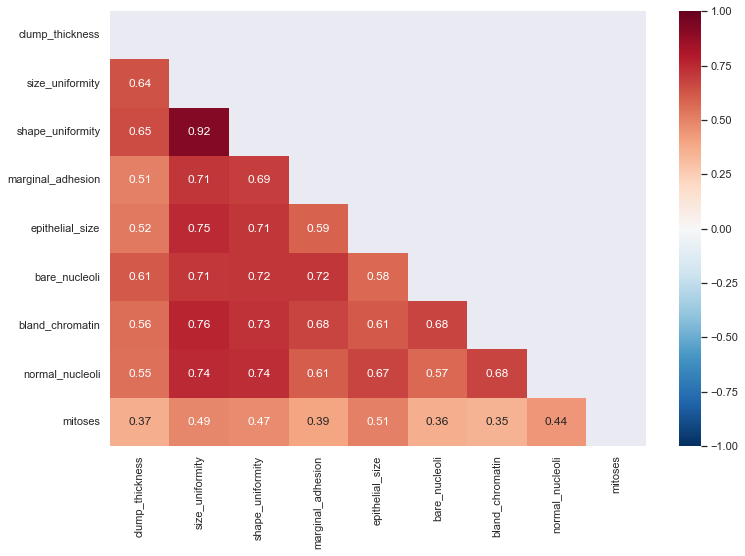

In [13]:
import seaborn as sns
import numpy as np

corr = features_train.drop(['id'],axis=1).corr()
display(corr)

%matplotlib inline
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)), vmin=-1, vmax=1, annot=True, cmap='RdBu_r');
